In [1]:
import tensorflow as tf
import numpy as np
import os

In [2]:
IMAGE_SIZE = 24

In [5]:
import cPickle
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

data_dir = "../data/cifar-10-batches-py"
filenames = [os.path.join(data_dir, file) for file in os.listdir(data_dir)]
test_filename = [f for f in filenames if 'test_batch' in f][0]
train_filenames = [f for f in filenames if 'data_batch' in f]

In [6]:
sample_dict = unpickle(test_filename)
print 'done'

done


In [8]:
import PIL.Image
from cStringIO import StringIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [10]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

3


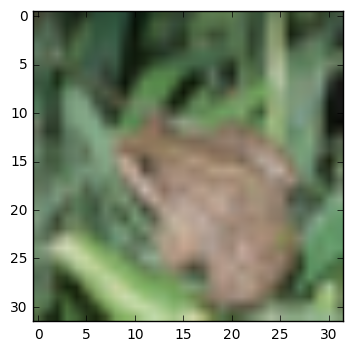

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
img = sample_dict['data'][4].reshape((3,32,32)).transpose(1,2,0)
plt.imshow(img)
print sample_dict['labels'][0]

In [12]:
def _int64_feature(value):
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def _bytes_feature(value):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [13]:
def convert(cifar_files, out_path):
    writer = tf.python_io.TFRecordWriter(out_path)
    for file in cifar_files:
        data = unpickle(file)
        for label, image in zip(data['labels'], data['data']):
            image = image.reshape((3,32,32)).transpose(1,2,0)
            image_raw = image.tostring()
            fdict = {'label': _int64_feature(label), 'image': _bytes_feature(image_raw)}
            example = tf.train.Example(features=tf.train.Features(feature=fdict))
            writer.write(example.SerializeToString())
            # print 'wrote', example.SerializeToString()
    writer.close()

In [14]:
convert([test_filename], 'cifar-test.tfrecords')

In [15]:
convert(train_filenames, 'cifar-train.tfrecords')